In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from numpy import diff
import numpy.polynomial.polynomial as poly
import copy

### Data Preparation Massachusetts

In [3]:
# covid data: https://www.mass.gov/info-details/covid-19-cases-quarantine-and-monitoring
# population: https://en.wikipedia.org/wiki/Massachusetts

populationMA = 6939373

## MA data
rawconfirmedMA = {
    '03/12': 108, '03/13': 123, '03/14': 138, '03/15': 164, '03/16': 197, '03/17': 218, '03/18': 256,
    '03/19': 328, '03/20': 413, '03/21': 525, '03/22': 646, '03/23': 777, '03/24': 1159, '03/25': 1838,
    '03/26': 2417, '03/27': 3240, '03/28': 4257, '03/29': 4955, '03/30': 5752, '03/31': 6620, '04/01': 7738,
    '04/02': 8966, '04/03': 10402, '04/04': 11736, '04/05': 12500, '04/06': 13837, '04/07': 15202, '04/08': 16790,
    '04/09': 18941, '04/10': 20974, '04/11': 22860, '04/12': 25475, '04/13': 26867, '04/14': 28163, '04/15': 29918,
    '04/16': 32181, '04/17': 34402
}

rawtestedMA = {
    '03/12': np.nan, '03/13': np.nan, '03/14': np.nan, '03/15': np.nan, '03/16': 1296, '03/17': 1751, '03/18': 2271,
    '03/19': 3132, '03/20': 4091, '03/21': 5207, '03/22': 6004, '03/23': 8922, '03/24': 13749, '03/25': 19794,
    '03/26': 23621, '03/27': 29371, '03/28': 35049, '03/29': 39066, '03/30': 43000, '03/31': 46935, '04/01': 51738,
    '04/02': 56608, '04/03': 62962, '04/04': 68800, '04/05': 71937, '04/06': 76429, '04/07': 83144, '04/08': 87511,
    '04/09': 94958, '04/10': 102372, '04/11': 108776, '04/12': 116730, '04/13': 122049, '04/14': 126551, '04/15': 132023,
    '04/16': 140773, '04/17': 148744
}

rawdeathsMA = {
    '03/12': 0, '03/13': 0, '03/14': 0, '03/15': 0, '03/16': 0, '03/17': 0, '03/18': 0,
    '03/19': 0, '03/20': 1, '03/21': 1, '03/22': 5, '03/23': 9, '03/24': 11, '03/25': 15,
    '03/26': 10, '03/27': 35, '03/28': 44, '03/29': 48, '03/30': 56, '03/31': 89, '04/01': 122,
    '04/02': 154, '04/03': 192, '04/04': 216, '04/05': 231, '04/06': 260, '04/07': 356, '04/08': 433,
    '04/09': 503, '04/10': 599, '04/11': 686, '04/12': 756, '04/13': 844, '04/14': 957, '04/15': 1108, 
    '04/16': 1245, '04/17': 1404
}

rawhospitalizedMA = {
    '03/12': 10, '03/13': 10, '03/14': 11, '03/15': 13, '03/16': 14, '03/17': 21, '03/18': 27,
    '03/19': 43, '03/20': 58, '03/21': 61, '03/22': 71, '03/23': 79, '03/24': 94, '03/25': 103,
    '03/26': 219, '03/27': 288, '03/28': 350, '03/29': 399, '03/30': 453, '03/31': 562, '04/01': 682,
    '04/02': 813, '04/03': 966, '04/04': 1068, '04/05': 1145, '04/06': 1241, '04/07': 1435, '04/08': 1583,
    '04/09': 1747, '04/10': 1956, '04/11': 2120, '04/12': 2235, '04/13': 2340, '04/14': np.nan, '04/15': np.nan,
    '04/16': np.nan, '04/17': np.nan
}

# create dataset out of dictionaries and calculations
dataMA = pd.DataFrame(rawconfirmedMA.items(), columns=['date', 'confirmed'])
dataMA['tested'] = rawtestedMA.values()
dataMA['dead'] = rawdeathsMA.values()
dataMA['hospitalized'] = rawhospitalizedMA.values()
dataMA['confirmedPerMillion'] = dataMA.confirmed/(populationMA/1000000)
dataMA['deadPerMillion'] = dataMA.dead/(populationMA/1000000)
dataMA['hospitalizedPerMillion'] = dataMA.hospitalized/(populationMA/1000000)
dataMA['deadPerHospitalized'] = dataMA.dead/dataMA.hospitalized
dataMA['daysSinceConfirmed100'] = np.arange(1,len(dataMA)+1,1)
dataMA['daysSinceDeath1'] = dataMA.index - dataMA.index[dataMA.dead > 0][0]
dataMA['daysSinceDeath10'] = dataMA.index - dataMA.index[dataMA.dead >= 10][0]

# create np.arrays out of columns
confirmedMA = np.array(dataMA['confirmed'])
testedMA = np.array(dataMA['tested'])
deadMA = np.array(dataMA['dead'])
datesMA = np.array(dataMA['date'])
daysSinceConfirmed100MA = np.array(dataMA['daysSinceConfirmed100'])
daysSinceDeath1MA = np.array(dataMA['daysSinceDeath1'])
daysSinceDeath10MA = np.array(dataMA['daysSinceDeath10'])
confirmedPerMilMA = np.array(dataMA['confirmedPerMillion'])
deadPerMilMA = np.array(dataMA['deadPerMillion'])
deadPerHospitalizedMA = np.array(dataMA['deadPerHospitalized'])
hospitalizedPerMilMA = np.array(dataMA['hospitalizedPerMillion'])
hospitalizedMA = np.array(dataMA['hospitalized'])

### Data Preparation Switzerland

In [4]:
populationCH = 8570146

In [5]:
# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_cases_switzerland_openzh.csv'
file = filepath + filename
raw_conf = pd.read_csv(file)
conf = raw_conf.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_fatalities_switzerland_openzh.csv'
file = filepath + filename
raw_dead = pd.read_csv(file)
dead = raw_dead.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_tested_switzerland_openzh.csv'
file = filepath + filename
raw_tested = pd.read_csv(file)
tested = raw_tested.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_hospitalized_switzerland_openzh.csv'
file = filepath + filename
raw_hosp = pd.read_csv(file)
hosp = raw_hosp.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_icu_switzerland_openzh.csv'
file = filepath + filename
raw_icu = pd.read_csv(file)
icu = raw_icu.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_vent_switzerland_openzh.csv'
file = filepath + filename
raw_vent = pd.read_csv(file)
vent = raw_vent.loc[:,['Date','CH']]

# https://github.com/daenuprobst/covid19-cases-switzerland
filepath = 'C:\\Users\\janal\\OneDrive\\Dokumente\\GitHub\\covid19-cases-switzerland\\'
filename = 'covid19_released_switzerland_openzh.csv'
file = filepath + filename
raw_released = pd.read_csv(file)
released = raw_released.loc[:,['Date','CH']]

dataCH = copy.deepcopy(conf)
dataCH = dataCH.rename(columns = {'Date': 'date', 'CH': 'confirmed'})
dataCH['tested'] = tested['CH']
dataCH['dead'] = dead['CH']
dataCH['hospitalized'] = hosp['CH']
dataCH['icu'] = icu['CH']
dataCH['vent'] = vent['CH']
dataCH['released'] = released['CH']


dataCH = dataCH[dataCH['confirmed'] >= 100]
dataCH = dataCH.reset_index(drop = True)

dataCH['confirmedPerMillion'] = dataCH.confirmed/(populationCH/1000000)
dataCH['deadPerMillion'] = dataCH.dead/(populationCH/1000000)
dataCH['deadPerHospitalized'] = dataCH.dead/dataCH.hospitalized
dataCH['hospitalizedPerMillion'] = dataCH.hospitalized/(populationCH/1000000)
dataCH['ventPerMillion'] = dataCH.vent/(populationCH/1000000)
dataCH['icuPerMillion'] = dataCH.icu/(populationCH/1000000)
dataCH['daysSinceConfirmed100'] = np.arange(1,len(dataCH)+1,1)
dataCH['daysSinceDeath1'] = dataCH.index - dataCH.index[dataCH.dead > 0][0]
dataCH['daysSinceDeath10'] = dataCH.index - dataCH.index[dataCH.dead >= 10][0]

#### only, if last rows are messy/incomplete ####
dataCH = dataCH.iloc[:-1]

# create np.arrays out of columns
confirmedCH = np.array(dataCH['confirmed'])
testedCH = np.array(dataCH['tested'])
deadCH = np.array(dataCH['dead'])
datesCH = np.array(dataCH['date'])
daysSinceConfirmed100CH = np.array(dataCH['daysSinceConfirmed100'])
daysSinceDeath1CH = np.array(dataCH['daysSinceDeath1'])
daysSinceDeath10CH = np.array(dataCH['daysSinceDeath10'])
confirmedPerMilCH = np.array(dataCH['confirmedPerMillion'])
deadPerMilCH = np.array(dataCH['deadPerMillion'])
deadPerHospitalizedCH = np.array(dataCH['deadPerHospitalized'])
hospitalizedPerMilCH = np.array(dataCH['hospitalizedPerMillion'])
ventPerMilCH = np.array(dataCH['ventPerMillion'])
icuPerMilCH = np.array(dataCH['icuPerMillion'])
hospitalizedCH = np.array(dataCH['hospitalized'])

In [6]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### Confirmed cases

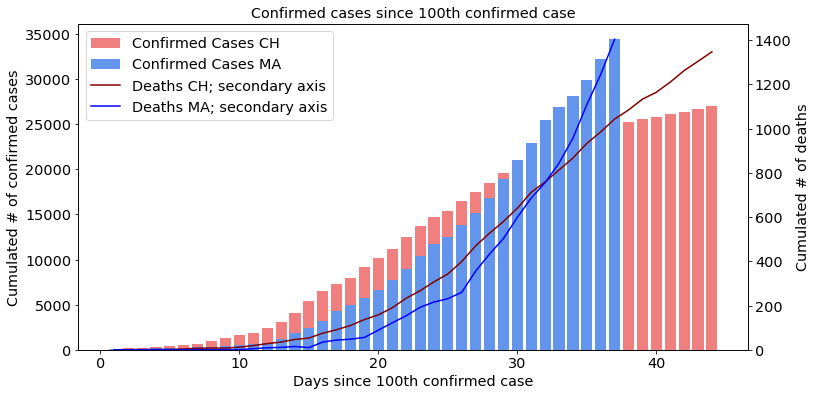

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

# primary y-axis
ax1.bar(daysSinceConfirmed100CH,confirmedCH, color = 'lightcoral', label = 'Confirmed Cases CH')
ax1.bar(daysSinceConfirmed100MA,confirmedMA, color = 'cornflowerblue', label = 'Confirmed Cases MA')

# secondary y-axis
ax2 = ax1.twinx()

ax2.plot(daysSinceConfirmed100CH,deadCH, color = 'maroon', label = 'Deaths CH; secondary axis')
ax2.plot(daysSinceConfirmed100MA,deadMA, color = 'blue', label = 'Deaths MA; secondary axis')
ax2.set_ylim(0)

# legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# labels
ax1.set(title = 'Confirmed cases since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = 'Cumulated # of confirmed cases')
ax2.set(ylabel = 'Cumulated # of deaths')

plt.show()

### Confirmed cases logarithmic

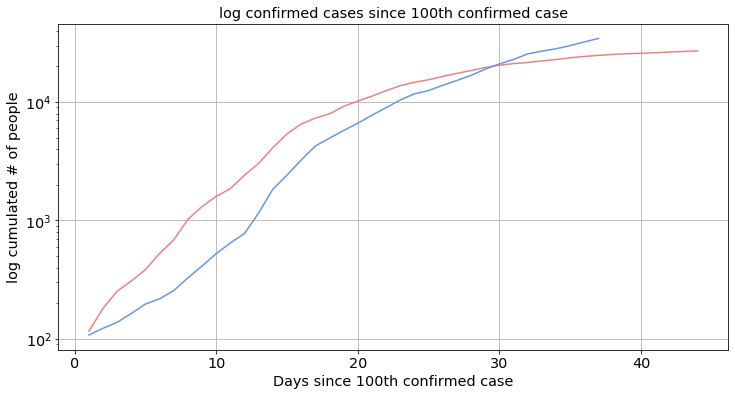

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

# primary y-axis
ax1.plot(daysSinceConfirmed100CH,confirmedCH, color = 'lightcoral', label = 'Confirmed Cases CH')
ax1.plot(daysSinceConfirmed100MA,confirmedMA, color = 'cornflowerblue', label = 'Confirmed Cases MA')

ax1.grid()
ax1.set_yscale("log")

# labels
ax1.set(title = 'log confirmed cases since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = 'log cumulated # of people')

plt.show()

### Confirmed cases per Capita

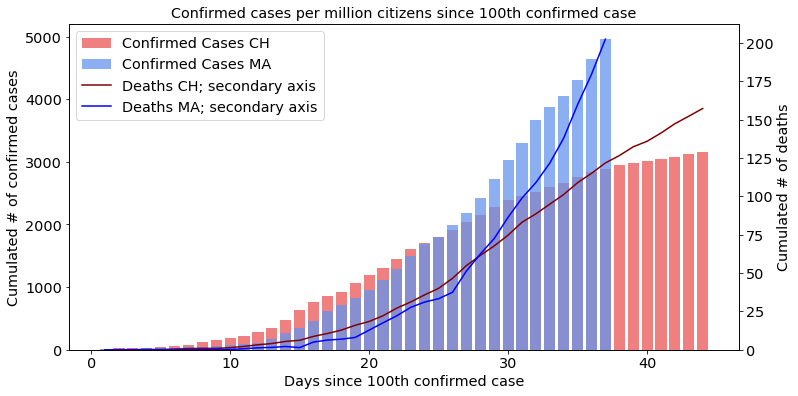

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

# primary y-axis
ax1.bar(daysSinceConfirmed100CH,confirmedPerMilCH, color = 'lightcoral', label = 'Confirmed Cases CH')
ax1.bar(daysSinceConfirmed100MA,confirmedPerMilMA, color = 'cornflowerblue', alpha = 0.75, label = 'Confirmed Cases MA')

# secondary y-axis
ax2 = ax1.twinx()

ax2.plot(daysSinceConfirmed100CH,deadPerMilCH, color = 'maroon', label = 'Deaths CH; secondary axis')
ax2.plot(daysSinceConfirmed100MA,deadPerMilMA, color = 'blue', label = 'Deaths MA; secondary axis')
ax2.set_ylim(0)

# legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# labels
ax1.set(title = 'Confirmed cases per million citizens since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = 'Cumulated # of confirmed cases')
ax2.set(ylabel = 'Cumulated # of deaths')

plt.show()

### 1st derivative confirmed cases

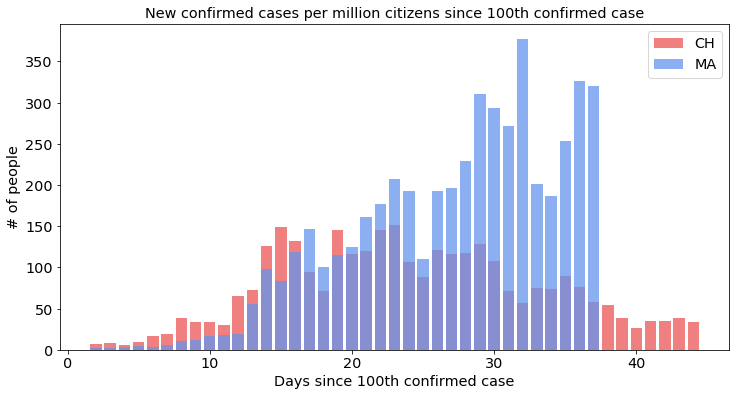

In [10]:
# first derivative of confirmed cases per Mil
slopeMA = diff(confirmedPerMilMA)/diff(daysSinceConfirmed100MA)
slopeCH = diff(confirmedPerMilCH)/diff(daysSinceConfirmed100CH)

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.bar(daysSinceConfirmed100CH[1:],slopeCH, color = 'lightcoral', label = 'CH')
ax1.bar(daysSinceConfirmed100MA[1:],slopeMA, color = 'cornflowerblue', alpha = 0.75, label = 'MA')

# legend
ax1.legend()

# labels
ax1.set(title = 'New confirmed cases per million citizens since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = '# of people')

plt.show()

### Newdeaths per Capita

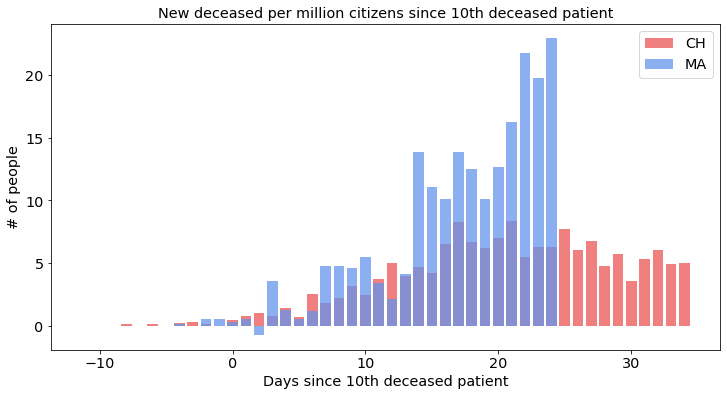

In [11]:
# first derivative of confirmed cases per Mil
slopeMA = diff(deadPerMilMA)/diff(daysSinceDeath10MA)
slopeCH = diff(deadPerMilCH)/diff(daysSinceDeath10CH)

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.bar(daysSinceDeath10CH[1:],slopeCH, color = 'lightcoral', label = 'CH')
ax1.bar(daysSinceDeath10MA[1:],slopeMA, color = 'cornflowerblue', alpha = 0.75, label = 'MA')

# legend
ax1.legend()

# labels
ax1.set(title = 'New deceased per million citizens since 10th deceased patient',
       xlabel = 'Days since 10th deceased patient',
       ylabel = '# of people')

plt.show()

### Doubling Time confirmed cases

In [12]:
def get_polyfit(time, values, order):
    coefs = poly.polyfit(time, values, order)
    ffit = poly.polyval(time, coefs)
    return ffit

def get_doublingtime(confirmed):
    growthratearray = []
    for i in range(1,len(confirmed)):
        confirmed_day = confirmed[i]
        confirmed_previous = confirmed[i-1]
        growthrate = 1 + (confirmed_day-confirmed_previous)/confirmed_previous
        growthratearray.append(growthrate)
    doublingtime = np.log(2)/np.log(growthratearray)
    return doublingtime

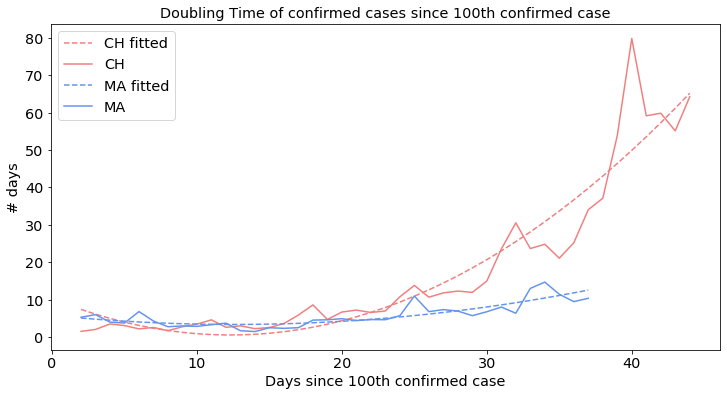

In [13]:
doublingtimeMA = get_doublingtime(confirmedMA)
doublingtimeCH = get_doublingtime(confirmedCH)

fitMA = get_polyfit(daysSinceConfirmed100MA[1:], doublingtimeMA, 2)
fitCH = get_polyfit(daysSinceConfirmed100CH[1:], doublingtimeCH, 2)

xMA = daysSinceConfirmed100MA[1:]
xCH = daysSinceConfirmed100CH[1:]

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.plot(xCH, fitCH, color = 'lightcoral', label = 'CH fitted',linestyle='dashed')
ax1.plot(xCH, doublingtimeCH, color = 'lightcoral', label = 'CH')

ax1.plot(xMA, fitMA, color = 'cornflowerblue', label = 'MA fitted',linestyle='dashed')
ax1.plot(xMA, doublingtimeMA, color = 'cornflowerblue', label = 'MA')

# legend
ax1.legend()

# labels
ax1.set(title = 'Doubling Time of confirmed cases since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = '# days')

plt.show()

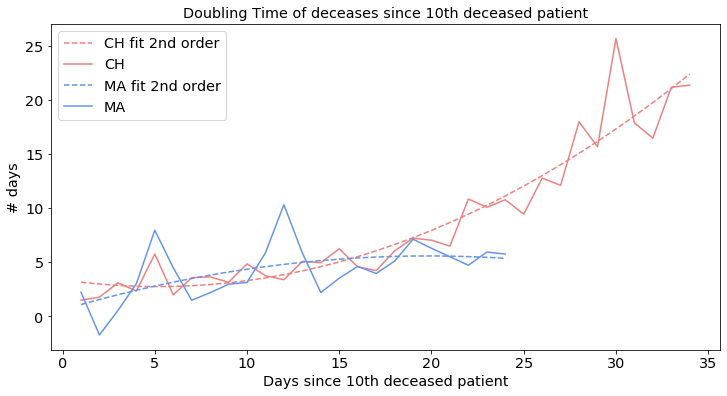

In [14]:
startCH = dataCH.index[dataCH.dead >= 10][0]
startMA = dataMA.index[dataMA.dead >= 10][0]


doublingtimeMA = get_doublingtime(deadMA[startMA:])
doublingtimeCH = get_doublingtime(deadCH[startCH:])

fitMA = get_polyfit(daysSinceDeath10MA[startMA + 1:], doublingtimeMA, 2)
fitCH = get_polyfit(daysSinceDeath10CH[startCH + 1:], doublingtimeCH, 2)

xMA = daysSinceDeath10MA[startMA + 1:]
yMA = doublingtimeMA
xCH = daysSinceDeath10CH[startCH + 1:]
yCH = doublingtimeCH

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.plot(xCH, fitCH, color = 'lightcoral', label = 'CH fit 2nd order',linestyle='dashed')
ax1.plot(xCH, yCH, color = 'lightcoral', label = 'CH')

ax1.plot(xMA, fitMA, color = 'cornflowerblue', label = 'MA fit 2nd order',linestyle='dashed')
ax1.plot(xMA, yMA, color = 'cornflowerblue', label = 'MA')

# legend
ax1.legend()

# labels
ax1.set(title = 'Doubling Time of deceases since 10th deceased patient',
       xlabel = 'Days since 10th deceased patient',
       ylabel = '# days')

plt.show()

### Hospitalization per Capita

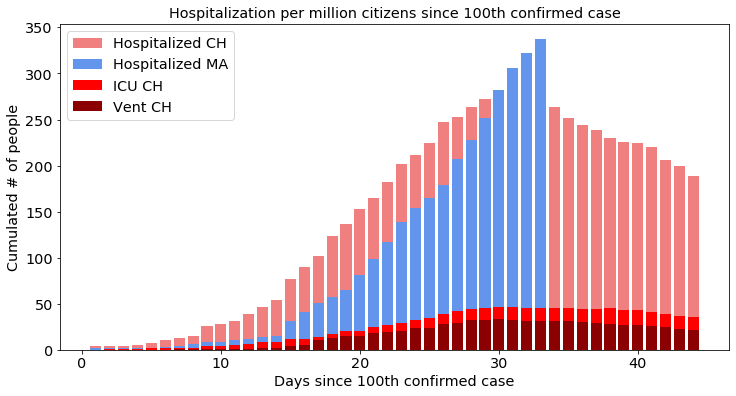

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

# primary y-axis

ax1.bar(daysSinceConfirmed100CH,hospitalizedPerMilCH, color = 'lightcoral', label = 'Hospitalized CH')

ax1.bar(daysSinceConfirmed100MA,hospitalizedPerMilMA, color = 'cornflowerblue', label = 'Hospitalized MA')

ax1.bar(daysSinceConfirmed100CH,icuPerMilCH, color = 'red', label = 'ICU CH')
ax1.bar(daysSinceConfirmed100CH,ventPerMilCH, color = 'darkred', label = 'Vent CH')

# legend
ax1.legend()

# labels
ax1.set(title = 'Hospitalization per million citizens since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = 'Cumulated # of people')

plt.show()

### New Hospitalizations per Capita

In [17]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

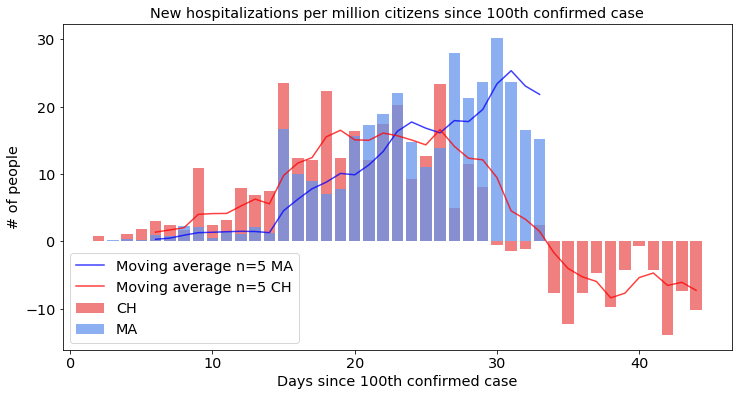

In [18]:
# first derivative of confirmed cases per Mil
slopeMA = diff(hospitalizedPerMilMA)/diff(daysSinceConfirmed100MA)
slopeCH = diff(hospitalizedPerMilCH)/diff(daysSinceConfirmed100CH)

n = 5
rollingMA = moving_average(slopeMA, n)
rollingCH = moving_average(slopeCH, n)

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.bar(daysSinceConfirmed100CH[1:],slopeCH, color = 'lightcoral', label = 'CH')
ax1.bar(daysSinceConfirmed100MA[1:],slopeMA, color = 'cornflowerblue', alpha = 0.75, label = 'MA')
ax1.plot(daysSinceConfirmed100MA[n:],rollingMA, color = 'blue', alpha = 0.75, label = 'Moving average n={} MA'.format(n))
ax1.plot(daysSinceConfirmed100CH[n:],rollingCH, color = 'red', alpha = 0.75, label = 'Moving average n={} CH'.format(n))

# legend
ax1.legend()

# labels
ax1.set(title = 'New hospitalizations per million citizens since 100th confirmed case',
       xlabel = 'Days since 100th confirmed case',
       ylabel = '# of people')

plt.show()

### Deceased per Hospitalized

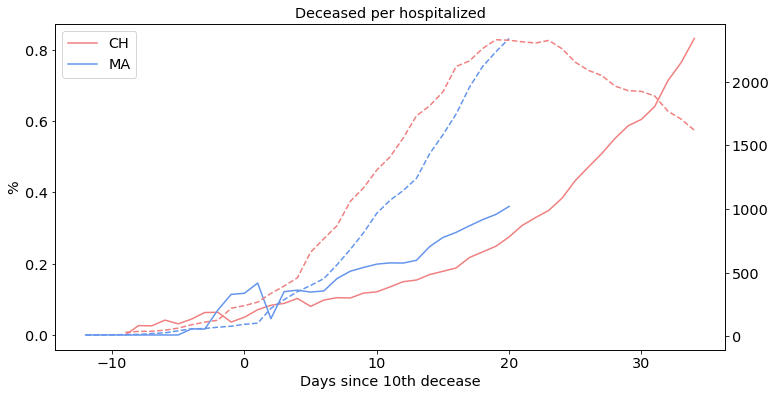

In [19]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)

ax1.plot(daysSinceDeath10CH,deadPerHospitalizedCH, color = 'lightcoral', label = 'CH')

ax1.plot(daysSinceDeath10MA,deadPerHospitalizedMA, color = 'cornflowerblue', label = 'MA')

ax2 = ax1.twinx()
ax2.plot(daysSinceDeath10MA,hospitalizedMA, color = 'cornflowerblue', label = 'MA',linestyle='dashed')
ax2.plot(daysSinceDeath10CH,hospitalizedCH, color = 'lightcoral', label = 'CH',linestyle='dashed')



# legend
ax1.legend()

# labels
ax1.set(title = 'Deceased per hospitalized',
       xlabel = 'Days since 10th decease',
       ylabel = '%')

plt.show()